<a href="https://colab.research.google.com/github/yiwenwangANU/Machine_Learning/blob/main/02_Neural_Network_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np

2.8.0


In [ ]:
from sklearn.datasets import make_circles

n_examples = 1000
X, y = make_circles(n_examples,
                    noise=0.03,
                    random_state=42)

In [ ]:
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [ ]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [ ]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:, 0],
                        "X1":X[:, 1],
                        "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


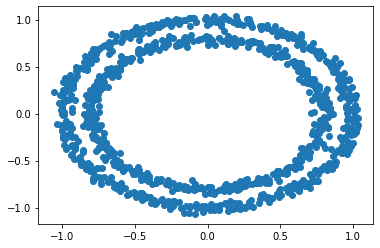

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1]);

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
tf.random.set_seed(42)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10, activation="relu"))
model.add(tf.keras.layers.Dense(1, activation="sigmoid"))
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=100, verbose=0)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


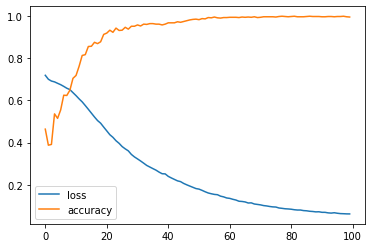

In [ ]:
pd.DataFrame(history.history).plot()

In [ ]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1031 - accuracy: 0.9900


[0.10310885310173035, 0.9900000095367432]

In [ ]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary create by a model predicting on X.
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  x_in = np.c_[xx.ravel(), yy.ravel()]
  y_pred = model.predict(x_in)

  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    y_pred = np.argmax(y_pred, axis=1).reshape(XX.shape)
  else:
    print("doing binary classificaion")
    y_pred = np.round(y_pred).reshape(xx.shape)
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())


doing binary classificaion


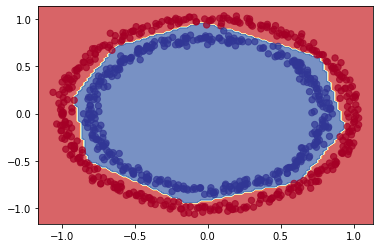

In [ ]:
plot_decision_boundary(model=model, X=X_train, y=y_train)

doing binary classificaion
doing binary classificaion


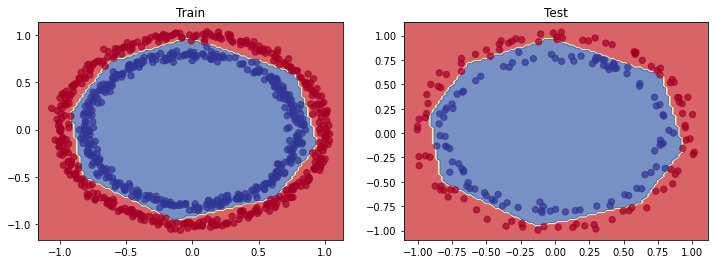

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model, X=X_test, y=y_test)

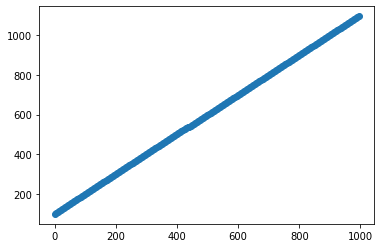

In [ ]:
tf.random.set_seed(42)

X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

plt.scatter(X_regression, y_regression)

In [ ]:
X_reg_train, X_reg_test, y_reg_train, y_reg_test = train_test_split(X_regression, y_regression, test_size = 0.2, random_state = 42)
X_reg_train = tf.expand_dims(X_reg_train, axis=-1)


In [ ]:
model_reg = tf.keras.Sequential()
model_reg.add(tf.keras.layers.Dense(10, activation="linear"))
model_reg.add(tf.keras.layers.Dense(1, activation="linear"))
model_reg.compile(loss=tf.keras.losses.MAE,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=["mae"])
history = model_reg.fit(X_reg_train, y_reg_train, epochs=100, verbose=0)

In [ ]:
model_reg.evaluate(X_reg_test, y_reg_test)

2/2 [==============================] - 0s 9ms/step - loss: 33.4039 - mae: 23.2867


[33.40387725830078, 23.286706924438477]

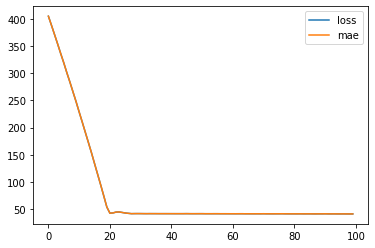

In [ ]:
pd.DataFrame(history.history).plot()

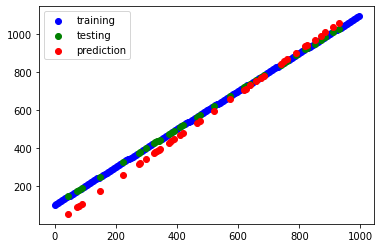

In [ ]:
plt.scatter(X_reg_train, y_reg_train, c="blue", label="training")
plt.scatter(X_reg_test, y_reg_test, c="green", label="testing")
plt.scatter(X_reg_test, model_reg.predict(X_reg_test), c="red", label="prediction")
plt.legend()
plt.show()

In [ ]:
tf.random.set_seed(42)

model_9 = tf.keras.Sequential()
model_9.add(tf.keras.layers.Dense(4, activation="relu"))
model_9.add(tf.keras.layers.Dense(4, activation="relu"))
model_9.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_9.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler],
                        verbose=0)

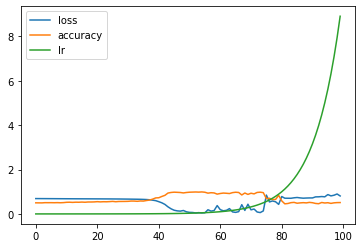

In [ ]:
pd.DataFrame(history_9.history).plot()

Text(0, 0.5, 'lOsS')

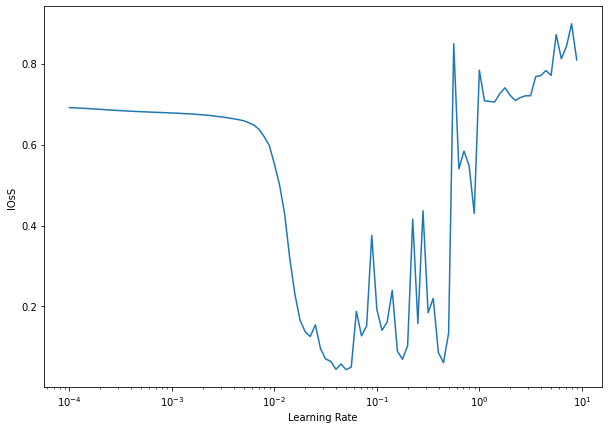

In [ ]:
lrs = 1e-4 * 10**(tf.range(100)/20)
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("lOsS")

In [ ]:
tf.random.set_seed(42)

model_10 = tf.keras.Sequential()
model_10.add(tf.keras.layers.Dense(4, activation="relu"))
model_10.add(tf.keras.layers.Dense(4, activation="relu"))
model_10.add(tf.keras.layers.Dense(1, activation="sigmoid"))

model_10.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(learning_rate=.02),
                metrics=["accuracy"])

history_10 = model_10.fit(X_train,
                        y_train,
                        epochs=25,
                        verbose=0)

In [ ]:
model_10.evaluate(X_test, y_test)

7/7 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9750


[0.1071704775094986, 0.9750000238418579]

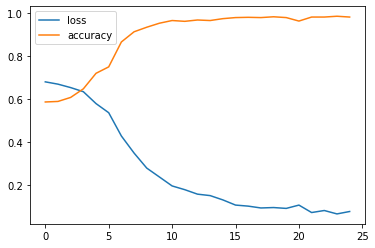

In [ ]:

pd.DataFrame(history_10.history).plot()

doing binary classificaion
doing binary classificaion


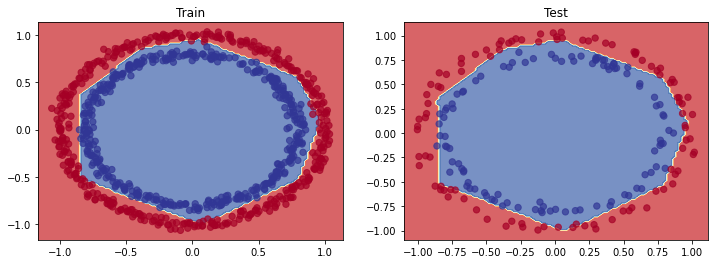

In [ ]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model=model_10, X=X_train, y=y_train)

plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model=model_10, X=X_test, y=y_test)

In [ ]:
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f"Model loss on the test set: {loss}")
print(f"Model accuracy on the test set: {(accuracy*100):.2f}%")

7/7 [==============================] - 0s 3ms/step - loss: 0.1072 - accuracy: 0.9750
Model loss on the test set: 0.1071704775094986
Model accuracy on the test set: 97.50%


In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = tf.math.round(tf.squeeze(model_10.predict(X_test)))
y_test,y_pred

(array([1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0,
        1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
        1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
        0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1,
        1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
        1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0,
        1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
        0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0,
        1, 1]), <tf.Tensor: shape=(200,), dtype=float32, numpy=
 array([1., 0., 1., 0., 1., 1., 0., 0., 1., 0., 0., 1., 0., 1., 0., 1., 1.,
        0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1.,
        0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 1., 1., 0.,
        0., 0., 0., 1., 0., 1., 1., 1., 0.

In [ ]:
confusion_matrix(y_test, y_pred) 

array([[96,  4],
       [ 1, 99]])